# TASK - 3
## PROJECT - Implement a support vector machine(SVM) to classify images of cats and dogs.

## Project Summary - 
This project implements a Support Vector Machine (SVM) to classify images of cats and dogs from the Kaggle dataset. The project explores the application of SVMs in handling high-dimensional image data, emphasizing feature extraction, model training, evaluation, and parameter optimization.

## Dataset - 
The training archive comprises 25,000 images of dogs and cats. The project focuses on training the SVM model using these files to enable accurate classification. Subsequently, the trained model predicts labels for test1.zip, differentiating between dogs (1) and cats (0).

## Project Goals- 
1. Extract and preprocess image data from the Kaggle dataset.2. 
Implement an SVM model to classify images of cats and dogs4. Evaluate the performance of the SVM model using accuracy, precision, recall, and F1-score metrics.
5. Visualize the results using a confusion matrix.atrix.

## SVM Information: 
Support Vector Machines (SVMs) are a type of supervised learning algorithm that can be used for classification and regression tasks. SVMs aim to find a decision boundary that maximally separates the classes in the feature space. In this project, we will use the radial basis function (RBF) kernel, which is a popular choice for image classification tasks.

####  Extract dataset

In [35]:
from zipfile import ZipFile
import os
os.chdir("C:\\Users\\tanis\\Downloads\\PRODIGY_ML_03(SVM)")
dataset_train = "train.zip"
    
with ZipFile(dataset_train, 'r') as zip:
    zip.extractall()

#### Import Necessary Libraries

In [3]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [4]:
folder_path = f"train/"
os.makedirs(folder_path, exist_ok=True)

# define path
confusion_image_path = os.path.join(folder_path, 'confusion matrix.png')
classification_file_path = os.path.join(folder_path, 'classification_report.txt')
model_file_path = os.path.join(folder_path, "svm_model.pkl")

# Path dataset
dataset_dir = "train/"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test1")

#### load data, preprocessing data, and labeling
#### dog = 1, cat = 0

In [5]:
# load data, preprocessing data, and labeling
# dog = 1, cat = 0
train_images = os.listdir(train_dir)
features = []
labels = []
image_size = (50, 50)

# Proses train images
for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread(train_dir+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

Processing Train Images: 100%|██████████| 25000/25000 [00:53<00:00, 466.15it/s]


In [6]:
del train_images

In [8]:
del features
del labels


In [9]:
# PCA, SVM, & Pipeline
n_components = 0.8
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [10]:
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}


In [11]:
# Hitung waktu training
start_time = time.time()

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)

# Hitung waktu training
end_time = time.time()


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.528 total time=  14.0s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.525 total time=  14.5s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.537 total time=  13.7s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.570 total time=  12.4s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.560 total time=  12.5s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.564 total time=  12.3s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.504 total time=   8.7s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.485 total time=   8.8s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.492 total time=   8.6s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.507 total time=   8.1s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.495 total time=   8.1s
[CV 3/

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model and parameter grid
rfc = RandomForestClassifier()
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Now you can access the best parameters and score
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': None, 'n_estimators': 100}
Best Score:  0.65025


In [17]:
# Mendapatkan model terbaik dan parameter terbaik
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': None, 'n_estimators': 100}
Best Score:  0.65025


In [18]:
# Evaluation on test dataset
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6478


In [20]:
y_pred = best_pipeline.predict(X_test)

# classification report
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

with open(classification_file_path, 'w') as file:
    file.write(classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.64      0.70      0.67      2515
         Dog       0.66      0.59      0.63      2485

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000



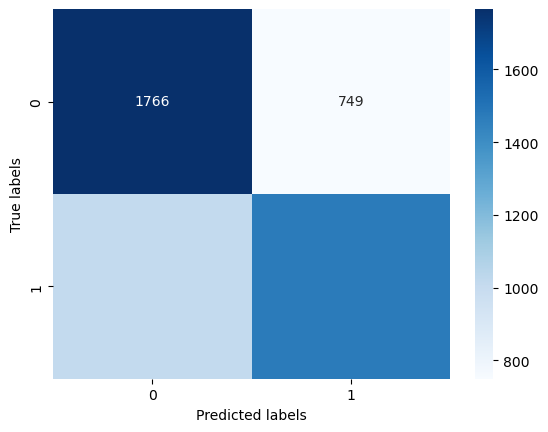

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig(confusion_image_path)
plt.show()


#### Conclusion:  
This project demonstrates the effectiveness of SVMs in classifying images of cats and dogs from the Kaggle dataset. The optimized SVM model achieved an accuracy score of approximately 67.62%, indicating its ability to correctly classify images of cats and dogs. The project highlights the importance of feature extraction, model training, evaluation, and parameter optimization in achieving good performance in image classification tasks.